1.  Análisis de metadatos dicom y visualización

1.1. Extraer y analizar los metadatos DICOM

In [1]:
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dcm_data_prueba = pydicom.dcmread(r'C:\Users\Isabela\Documents\2025-1\Imagenes\DatosEntrega1\Patient11\201\1.3.46.670589.11.45555.5.0.8800.2023062816190336887.dcm')
dcm_data_prueba

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 170
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.45555.5.0.8800.2023062816190336887
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'M_SE', 'M', 'SE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.46.670589.11.45555.5.0.8800.2023062816190336887
(0008,0020) Study Date                          DA: '20230628'
(0008,0021) Series Date                         DA: '2

In [3]:
nombre_paciente = dcm_data_prueba.PatientName
print("Patient name: "+ str(nombre_paciente))
modality= dcm_data_prueba.Modality
print("Modality: "+ str(modality))
SliceThickness= dcm_data_prueba.SliceThickness
print("Slice Thickness: "+ str(SliceThickness))
BodyPartExamined= dcm_data_prueba.BodyPartExamined
print("Body Part Examined: "+ str(BodyPartExamined))
MRAcquisitionType= dcm_data_prueba.MRAcquisitionType
print("MR Acquisition Type: "+ str(MRAcquisitionType))
PhotometricInterpretation= dcm_data_prueba.PhotometricInterpretation
print("Photometric Interpretation: "+ str(PhotometricInterpretation))
RepetitionTime= dcm_data_prueba.RepetitionTime
print("Repetition Time (TR): "+ str(RepetitionTime))
EchoTime= dcm_data_prueba.EchoTime
print("EchoTime (ET): "+ str(EchoTime))
SpacingBetweenSlices= dcm_data_prueba.SpacingBetweenSlices
print("SpacingBetweenSlices: "+ str( SpacingBetweenSlices))
Manufacturer= dcm_data_prueba.Manufacturer
print("Manufacturer: "+ str( Manufacturer))
MagneticFieldStrength = dcm_data_prueba.MagneticFieldStrength 
print("Magnetic Field Strength : "+ str( MagneticFieldStrength ))
#ScannerModel = dcm_data_prueba.ScannerModel 
#print("Scanner Model : "+ str( ScannerModel ))

Patient name: TEST
Modality: MR
Slice Thickness: 4
Body Part Examined: LSPINE
MR Acquisition Type: 
Photometric Interpretation: MONOCHROME2
Repetition Time (TR): -1
EchoTime (ET): -1
SpacingBetweenSlices: 5
Manufacturer: Philips
Magnetic Field Strength : None


In [4]:
dcm_data_prueba. dir('Scanner') #No existe el atributo
#dcm_data_prueba.ScannerModel    

[]

In [5]:
lista=["PatientName","Modality","SliceThickness","BodyPartExamined","MRAcquisitionType",
       "PhotometricInterpretation","RepetitionTime","EchoTime","SpacingBetweenSlices","Manufacturer",
       "MagneticFieldStrength"]

nombre=[]
num_tag=[]
tipo=[]
valor=[]
for i in lista:
    nombre.append(str(dcm_data_prueba[i].name))
    num_tag.append(str(dcm_data_prueba[i].tag))
    tipo.append(str(dcm_data_prueba[i].VR))
    valor.append(str(dcm_data_prueba[i].value))

In [6]:
data={"Name":nombre,"Tag":num_tag,"Type":tipo,"Value":valor}
DataF=pd.DataFrame(data)
DataF

,Name,Tag,Type,Value
0,Patient's Name,"(0010,0010)",PN,TEST
1,Modality,"(0008,0060)",CS,MR
2,Slice Thickness,"(0018,0050)",DS,4
3,Body Part Examined,"(0018,0015)",CS,LSPINE
4,MR Acquisition Type,"(0018,0023)",CS,
5,Photometric Interpretation,"(0028,0004)",CS,MONOCHROME2
6,Repetition Time,"(0018,0080)",DS,-1
7,Echo Time,"(0018,0081)",DS,-1
8,Spacing Between Slices,"(0018,0088)",DS,5
9,Manufacturer,"(0008,0070)",LO,Philips


-Patient's name: hace referencia al nombre completo del paciente, pertenece al grupo 0010 que corresponde al modulo de información del paciente, indica a quién pertenece la imagen, acepta PN que indica person name que es una cadena de caracteres codificada con 5 componentes que para humanos son apellido complejo, nombre complejo, segundo nombre, prefijo y sufijo, puede contener como máximo 64 caracteres.

-Modality: hace referencia al tipo de proceso, dispositivo o método que originalmente adquirió o produjo los datos empleados en la creación de la serie, pertenece al grupo 0008, indica la modalidad de adquisición de la imagen, acepta CS que indica code string que es una cadena de caracteres que acepta términos controlados (por ejemplo ANN, AR, Bi, entre otros) y tiene un máximo de 16 bytes.

-Slice Thickness: hace referencia al espesor del corte de la imagen en milímetros, pertenece al grupo 0018 que está relacionado con información correspondiente al proceso de obtención de la imagen, acepta DS que indica decimal string e incluye números del 0 al 9, la letra "E", "e" y los símbolos "+" y "-", con un máximo de 16 bytes.

-Body Part Examined: es una descripción de la parte del cuerpo examinada en la imagen, pertenece al grupo 0018, permite identificar la parte del cuerpo que está contenida en la imagen, acepta CS (por ejemplo LSPINE, HEADNECK, FEMORALA, entre otras) con un máximo de 16 bytes.

-MR Acquisition Type: puede representar dos cosas dependiendo del modulo de atributos al que pertenezca. Si pertenece al módulo de atributos de imagen MR es la identificación del esquema de codificación de datos (2D o 3D) y si pertenece al módulo de atributos de secuencia de pulso MR hace referencia a la identificación del esquema de codificación de datos espaciales (1D, 2D o 3D). Pertenece al grupo 0018, acepta CS (por ejemplo 2D o 3D) con un máximo de 16 bytes.

-Photometric Interpretation: especifica la interpretación de la información en los pixeles, pertenece al grupo 0028 que principalmente contiene información sobre los pixeles de la imagen, permite determinar en qué sentido se da la variación de la escala de los pixeles, por ejemplo, monochrome 1 varía de claros a oscuros mientras que monochrome 2 varía de oscuros a claros. acepta CS (por ejemplo monochrome 1, monochrome 2) con un máximo de 16 bytes.

-Repetition Time: es el periodo de tiempo en milisegundos que transcurre entre el comienzo de una secuencia de pulsos y el comienzo de la siguiente, indica el tiempo de repetición de los pulsos de radiofrecuencia. Pertenece al grupo 0018, acepta DS (decimal string) con un máximo de 16 bytes..

-Echo Time: es el tiempo en milisegundos entre la mitad del pulso de excitación y el pico del eco producido. Pertenece al grupo 0018 e indica el tiempo de respuesta de la excitación que se va a capturar (tiempo de relajación de los protones del cuerpo), acepta DS (decimal string) con un máximo de 16 bytes.

-Spacing Between Slices: representa la separación en milímetros entre cortes adyacentes, esta distancia se mide desde el centro de cada uno. Pertenece al grupo 0018 y acepta DS (decimal string) con un máximo de 16 bytes.

-Manufacturer: indica el fabricante del equipo. Pertenece al grupo 0008 y acepta valores tipo LO, es decir, long string que es una cadena de máximo 64 caracteres.

-Magnetic Field Strength: representa la intensidad del campo generado por el imán medido en teslas. Pertenece al grupo 0018 y acepta DS (decimal string) con un máximo de 16 bytes.

**Referencias**

[1]	Nema.org. [En línea]. Disponible en: https://dicom.nema.org/medical/dicom/current/output/html/part03.html#sect_C.38.1.3.2. [Consultado: 23-abr-2025].

[2]	L. L. C. Innolitics, “DICOM standard browser”, Innolitics.com. [En línea]. Disponible en: https://dicom.innolitics.com/ciods/ultrasound-image/general-series/00180015. [Consultado: 23-abr-2025].


1.2. Interpretación técnica 

Parmetros técnicos:

-Slice Thickness

-Spacing Between Slices

-MR Acquisition Type

-Body Part Examined

-Repetition Time

-Echo Time

-Magnetic Field Strength

El parámetro Magnetic Field Strength, es fundamental en la adquisición de la imagen porque en el campo del imán es que se basa el funcionamiento del resonador magnético, este campo obliga a los protones a cambiar su alineación natural [3] y cuanto más potente sea (más teslas tenga) mejor será la calidad de la imagen, teniendo en cuenta que actualmente existen valores máximos de teslas para uso clínico. A esto van muy arraigados los parámetros Repetition Time y Echo Time, pues el tiempo de repetición indica la frecuencia de pulsos de radiofrecuencia que son enviados al paciente, estimulando los protones haciéndolos girar fuera del equilibrio [3] y luego viene el tiempo de eco, en el que se apaga el campo y se captura la energía liberada por los protones en su proceso de relajación en el cual vuelven a su alineación inicial [3].

El parámetro MR Acquisition Type da cuenta de cuántos planos son potenciados en la imagen adquirida, en 2D solo se potencia un plano mientras que en 3D se potencian los tres planos y por tanto una resonancia magnética en 3D implica mayor cantidad de cortes y resolución, aumentando el tiempo de la toma, mientras que en 2D se toman secuencias de cortes del cuerpo en planos específicos dependiendo de la parte que vaya a ser examinada y es aquí donde el parámetro Body Part Examined cobra relevancia, pues mediente este se determina si el corte será axial, coronal o sagital, también dependiendo de la parte examinada será el tiempo que tarden los protones en realinearse con el campo magnético y liberar su energía pues estas propiedades magnéticas dependen del tipo de tejido [3].

El parámetro Spacing Between Slices puede dar cuenta del detalle de la imagen dado que entre menor sea el espacio entre los cortes de una secuencia se tiene mayor continuidad en la imagen y una mayor calidad [4] y está muy relacionado con Slice Thickness que da cuenta del grosor total de la secuencia de cortes, ya que, al incrementar el espacio entre cada corte se puede disminuir la cantidad de estos que se requieren para cubrir el mismo volumen lo cual representa beneficios en términos de eficiencia y reducción del tiempo del examen [4]. En la adquisición de la imagen se debe encontrar un equilibrio entre el espaciado de cortes necesario para disminuir los artefactos de interferencias cruzadas para tener una mayor calidad de la imagen y el tiempo de adquisición de esta [4].  



[3]	“Imagen por Resonancia Magnética (IRM)”, National Institute of Biomedical Imaging and Bioengineering. [En línea]. Disponible en: https://www.nibib.nih.gov/espanol/temas-cientificos/imagen-por-resonancia-magn%C3%A9tica-irm. [Consultado: 23-abr-2025].

[4]	“MRI distance factor / Slice gap”, mrimaster, 06-may-2024. [En línea]. Disponible en: https://mrimaster.com/mri-distance-factor-slice-gap/. [Consultado: 23-abr-2025].


1.3. Visualización

In [10]:
dcm_data_prueba.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(480, 480), dtype=uint16)

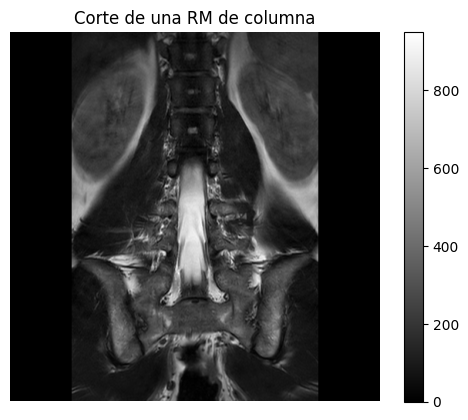

In [60]:
im = dcm_data_prueba.pixel_array
plt.imshow(im, cmap= 'gray' )
plt.axis( 'off' )
plt.title( 'Corte de una RM de columna' )
plt.colorbar()
plt.show()